# Numerical integration

Numerical integration will be useful in circumstances analagous to the circumstances in which numerical differentiation is useful. I.e., those in which:
  1. The analytical integral in terms of basic functions does not exist.
  2. The analytical integral in terms of basic functions is difficult to derive or code up.
  3. You're not sure ahead of time what kind of function you'll be integrating.

A very easy example of a basic task where numerical integration is needed is computing values of the normal distribution (bell curve) Cumulative Distrbution Function (CDF). No simple analytical expression for the integral of $\frac{1}{2\pi \sigma^2} e^{-\frac{x-\mu}{2 \sigma^2}}$ with respect to $x$ exists. It must be numerically integrated using methods related to those we'll cover in this lesson.

## How to do it

Intuitively, numerical integration can seem even simpler than numerical differentiation. The task is to sum area under the curve. So we approximate the area by discretizing it into many smaller pieces, the area of each of which can be easily computed. Then we sum all the pieces.

There is some distance to cover, however, between this simple rough idea and actual implementation. As is often recommendable, we will allow our implementation to be guided by a careful derivation from known facts. To maximize continuity and coherence of the course material, we will directly tie our derivations for numerical integration to those we showed for numerical differentiation.

As we've already gotten "warmed up" through the differentiation lesson, let's dive now directly into the derivations.

## Derivations of forward, backward, and centered approaches to integration

We can derive forward, backward, and centered approaches to numerical integration from the same Taylor approximation starting point we used for numerical differentiation. The "centered" approach is often referred to as the "trapezoidal rule" for numerical integration.

I'm not aware of this approach to the derivation existing in any other book or resource. But I believe it will serve us well for this course.

Let's start with a quick little Lemma which we'll refer back to later:

**Lemma 1:**

$$ f(b) - f(a) = \sum\limits_{i = 0}^{n-1} \left [ f\left(a+ (i+1) \frac{b-a}{n}\right) - f\left(a + i \frac{b-a}{n}\right) \right ] = \sum\limits_{i = 1}^{n} \left [ f\left(a+ i \frac{b-a}{n}\right) - f\left(a + (i-1) \frac{b-a}{n}\right) \right ]$$

**Proof:** Simple algebra.

$$\begin{align}\sum\limits_{i = 0}^{n-1} \left [ f\left(a+ (i+1) \frac{b-a}{n}\right) - f\left(a + i \frac{b-a}{n}\right) \right ]&= - f\left(a \right) + f\left(a+  \frac{b-a}{n}\right) - f\left(a+  \frac{b-a}{n}\right) + f\left(a+  2 \frac{b-a}{n}\right) -  f\left(a+  2 \frac{b-a}{n}\right) +  \dots + f(b)\\
&= f(b) - f(a)
\end{align}$$

### Forward difference numerical integral

The Taylor expansion of $f(x+h)$ around $x$ can be rearranged to yield

$$ f'(x) = \frac{f(x+h) - f(x)}{h} + A^{+}(h), $$

where $A^{+}(h)$ is defined as

$$A^{+}(h) = -\left(\frac{f''(x)}{2!}h  +\frac{f'''(x)}{3!}h^2 +\frac{f''''(x)}{4!}h^3 + \dots \right)$$

Multiplying both sides by $h$, and effecting the change of variable $x = a + \frac{b-a}{n}$ and $h = \frac{b-a}{n}$, we have
$$\frac{b-a}{n} f'\left(a + i \frac{b-a}{n}\right) =  f\left(a+ (i+1) \frac{b-a}{n}\right) - f\left(a + i \frac{b-a}{n}\right) + \frac{b-a}{n} A^{+}\left(\frac{b-a}{n}\right) $$


Summing both sides from $i = 0$ to $i = n-1$ and applying **Lemma 1**, we obtain:
$$\begin{align}\sum\limits_{i=0}^{n-1} \frac{b-a}{n} f'\left(a + i \frac{b-a}{n}\right) &= \sum\limits_{i=0}^{n-1} \left [ f\left(a+ (i+1) \frac{b-a}{n}\right) - f\left(a + i \frac{b-a}{n}\right) + \frac{b-a}{n} A^{+}\left(\frac{b-a}{n}\right) \right ]\\
&= f(b) - f(a) + (b-a) A^{+}\left(\frac{b-a}{n}\right)\end{align}$$

Finally, applying the definition of an integral subtracting the error term from both sides:
$$\int_a^b f'(x) d x = \sum\limits_{i=0}^{n-1} \frac{b-a}{n} f'\left(a + i \frac{b-a}{n}\right) - (b-a) A^{+}\left(\frac{b-a}{n}\right)$$

### Backward difference numerical integral

The Taylor expansion of $f(x-h)$ around $x$ can be rearranged to yield

$$ f'(x) = \frac{f(x) - f(x-h)}{h} + A^{-}(h), $$

where $A^{+}(h)$ is defined as

$$A^{+}(h) = -\left(-\frac{f''(x)}{2!}h  +\frac{f'''(x)}{3!}h^2 -\frac{f''''(x)}{4!}h^3 + \dots \right)$$

Multiplying both sides by $h$, and effecting the change of variable $x = a + \frac{b-a}{n}$ and $h = \frac{b-a}{n}$, we have
$$\frac{b-a}{n} f'\left(a + i \frac{b-a}{n}\right) =  f\left(a+ \frac{b-a}{n}\right) - f\left(a + (i-1) \frac{b-a}{n}\right) + \frac{b-a}{n} A^{-}\left(\frac{b-a}{n}\right) $$


Summing both sides from $i = 1$ to $i = n$ and applying **Lemma 1**, we obtain:
$$\begin{align}\sum\limits_{i=1}^{n} \frac{b-a}{n} f'\left(a + i \frac{b-a}{n}\right) &= \sum\limits_{i=1}^{n} \left [ f\left(a+ i \frac{b-a}{n}\right) - f\left(a + (i-1) \frac{b-a}{n}\right) + \frac{b-a}{n} A^{-}\left(\frac{b-a}{n}\right) \right ]\\
&= f(b) - f(a) + (b-a) A^{-}\left(\frac{b-a}{n}\right)\end{align}$$

Finally, applying the definition of an integral subtracting the error term from both sides:
$$\int_a^b f'(x) d x = \sum\limits_{i=1}^{n} \frac{b-a}{n} f'\left(a + i \frac{b-a}{n}\right) - (b-a) A^{-}\left(\frac{b-a}{n}\right)$$

### Centered difference numerical integral


This is commonly known as the **trapezoidal rule**. If we combine the approximations we derived from the forward and backward difference formulas, weighting each by $\frac{1}{2}$, we obtain:

$$\int_a^b f'(x) d x = \sum\limits_{i=1}^{n} \frac{b-a}{2n} \left [ f'\left(a + i \frac{b-a}{n}\right) + f'\left(a + (i-1) \frac{b-a}{n}\right) \right ] - \frac{b-a}{2} \left [ A^{+}\left(\frac{b-a}{n}\right) +  A^{-}\left(\frac{b-a}{n}\right)\right ]$$

A quick inspection of $A^{+}(.)$ and $A^{-}(.)$ as defined above informs us that exactly half the terms will exactly cancel each other out when they are combine in this way, meaning that this method of approximating the integral should be more accurate than either the forward or backward approaches and exact if $f'(.)$ is linear.

For computation purposes, the following rearrangement is convenient, to minimize the number of times that $f'(.)$ needs to be evaluated:

$$\int_a^b f'(x) d x =  \frac{b-a}{n}  \left [ \frac{f'(a)}{2} + \sum\limits_{i=1}^{n-1}  f'\left(a + i \frac{b-a}{n}\right)  + \frac{f'(b)}{2} \right ] - \frac{b-a}{2} \left [ A^{+}\left(\frac{b-a}{n}\right) +  A^{-}\left(\frac{b-a}{n}\right)\right ]$$

### Errors and the limit

In all three approaches (forward, backward, and centered "trapezoidal rule"), approximation error for the integral over a given interval $a$ to $b$ are decreasing in $n$ and approach zero as $n \to \infty$.


## "Coding up" the numerical integration rules

Let's now implement what we've derived. In the next cell, we define 4 functions:
  1. `numint_for_series`: performs numerical integration of function `f` over a set of intervals defined by common starting point `a` and a series of values `x`, using numerical integration function `numint_f` and grids with `n` points.
  2. `numint_demo`: given a function `f`, it's true integral `true_F`, a name for the function being integrated, a name for the numerical integration approach, and other parameters, plot a demo of the numerical integration result versus the "true" target.
  3. `forward_numint`: implements the forward approach
  4. `backward_numint`: implements the backward approach



In [45]:
import numpy as np
import matplotlib.pyplot as plt

def numint_for_series(a,x,n,f,numint_f):
    return np.array([numint_f(a,b,n,f) for b in x])

def numint_demo(a,x,n,f,true_F,name_of_f,numint_f,name_of_numint_f):
    plt.figure()
    plt.plot(x,true_F(x) - true_F(a),'k--',
             label=f'true integral of {name_of_f}')
    plt.plot(x,numint_for_series(0,x,n,f,numint_f),
             label=f'numerical integral of {name_of_f} w/ {n} points')
    plt.title(f'integration, {name_of_numint_f}')
    plt.legend()
    plt.show()



def forward_numint(a,b,n,f):
    for_summing = np.linspace(a,b,n+1)
    return ((b-a)/n)*np.sum(f(for_summing[0:-1]))

def backward_numint(a,b,n,f):
    for_summing = np.linspace(a,b,n+1)
    return ((b-a)/n)*np.sum(f(for_summing[1:]))






#### Example 1: $2 x$

Below we demo the forward and backward approaches to approximating the integral of $f(x) = 2 x$, using a grid of 5 points.

**Quick exercise:** Change the number of points. What happens to the error?

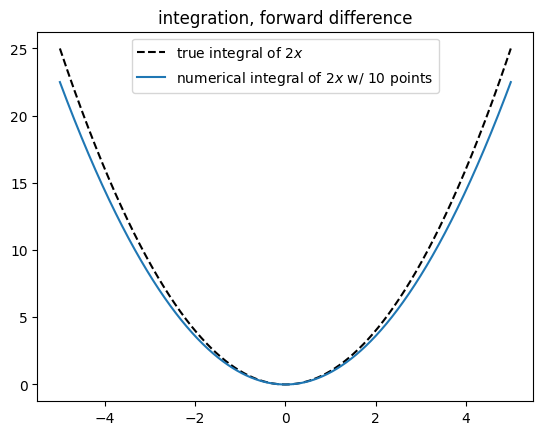

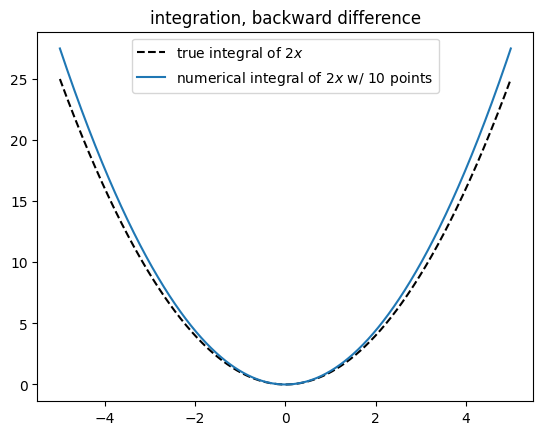

In [51]:

n = 10

x = np.linspace(-5,5,1000)

numint_demo(0,x,n,
            lambda x: 2*x,lambda x: x**2,
            '$2 x$',
            forward_numint,'forward difference')


numint_demo(0,x,n,
            lambda x: 2*x,lambda x: x**2,
            '$2 x$',
            backward_numint,'backward difference')

#### Example 2: $\cos x$

Below we demo the forward and backward approaches to approximating the integral of $f(x) = \cos x$, using a grid of 5 points.

**Quick exercise:** Change the number of points. What happens to the error?

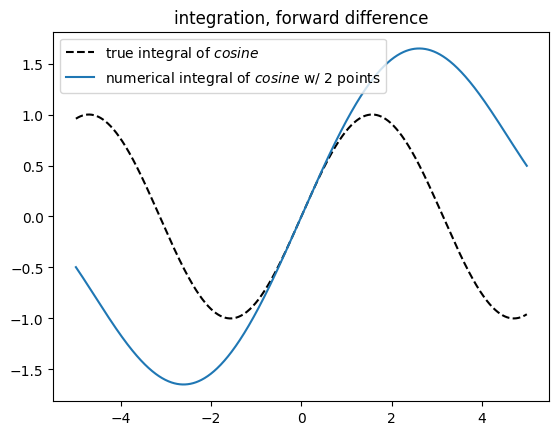

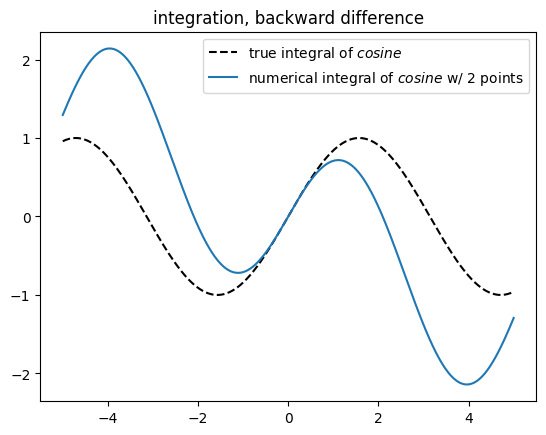

In [54]:
n = 2

numint_demo(0,np.linspace(-5,5,1000),n,
            lambda x: np.cos(x),lambda x: np.sin(x),
            '$cosine$',
            forward_numint,'forward difference')


numint_demo(0,np.linspace(-5,5,1000),n,
            lambda x: np.cos(x),lambda x: np.sin(x),
            '$cosine$',
            backward_numint,'backward difference')

### Quick exercise for numerical integration

 - Implement the centered "trapezoidal rule" for numerical integration in 2 ways: one by combining the two approaches which are already coded, and one "from scratch" implementing the more efficient formula given in the derivation section.
 - Check that your two approaches yield the same results.
 - Compare performance of the "trapezoidal rule" to the forward and backward difference approaches, for the two functions given above + 1 additional function of your choice.